In [559]:
from dataset import MnistDataset
import matplotlib.pyplot as plt
import torch

In [560]:
trainDataset = MnistDataset(csv_path="/speech/arjun/exps/1study/data/MNIST_CSV/mnist_train.csv")

/speech/arjun/exps/1study/generative-models/dataset.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = torch.Tensor(self.images.iloc[idx, :]).reshape(28,28)


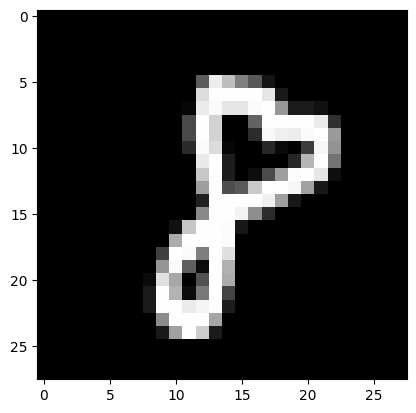

In [561]:
img, lbl = trainDataset[torch.randint(0, len(trainDataset), size=(1,)).item()]
plt.imshow(img, cmap="gray")

In [562]:
print(img.mean(), img.var())

tensor(31.6760) tensor(5934.8784)


In [563]:
img = (img - img.mean())/img.std()
print(img.mean(), img.var())

tensor(7.2985e-09) tensor(1.0000)


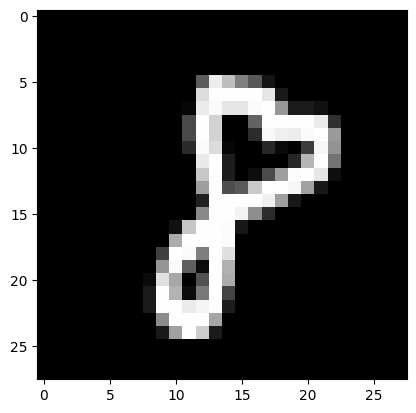

In [564]:
plt.imshow(img, cmap="gray")

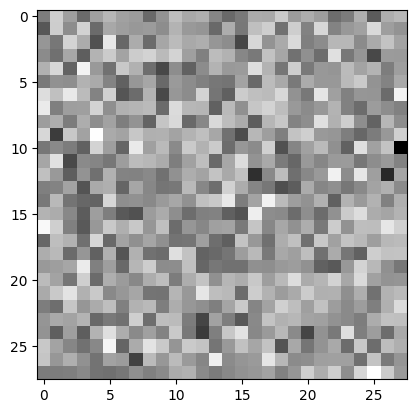

In [565]:
noise = torch.normal(0,1,(28,28))
plt.imshow(noise, cmap="gray")

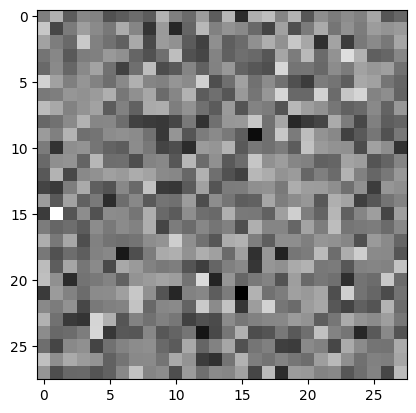

In [566]:
# noising process
noisy_img = img.clone()
for _ in range(100000):
    noise = torch.normal(0,1,(28,28))
    noisy_img += noise

plt.imshow(noisy_img, cmap="gray")

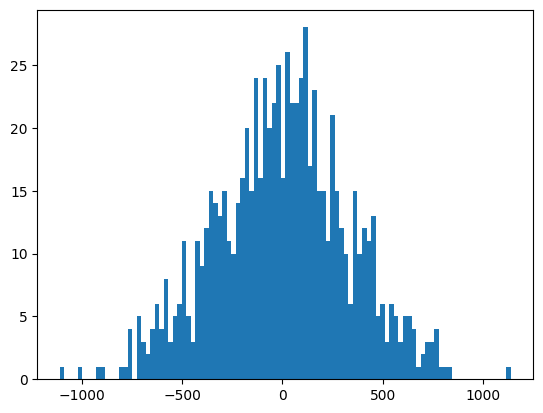

In [567]:
plt.hist(noisy_img.flatten(), bins=100);

In [568]:
print(noisy_img.mean(), noisy_img.var())

tensor(-1.0334) tensor(111036.9531)


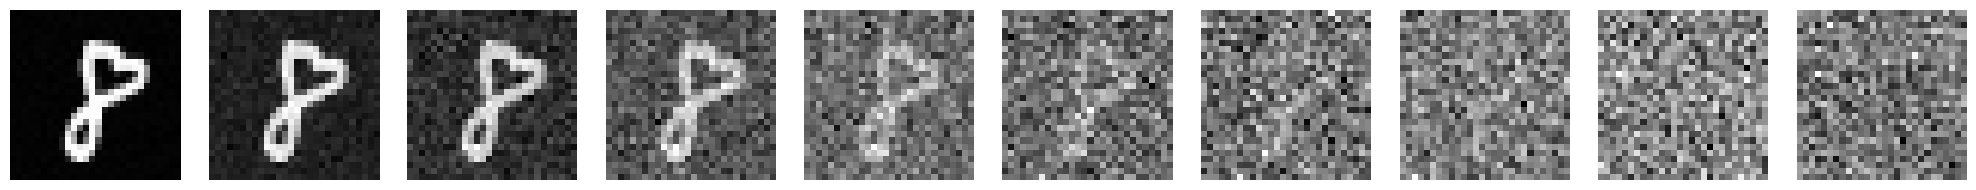

In [574]:
# noising step using beta
init_beta = 0.02
num_steps = 10
ckpt_step = num_steps / 10
beta = torch.linspace(init_beta, 1, num_steps)
noisy_img = img.clone()
save_img = []
for t in range(num_steps):
    noisy_img = torch.normal(torch.sqrt(1-beta[t]) * noisy_img, beta[t] * torch.ones(noisy_img.shape))
    if t % ckpt_step == 0:
        save_img.append(noisy_img.clone()) 
fig, axes = plt.subplots(1, len(save_img), figsize=(len(save_img) * 2, 2))
for ax, i in zip(axes, save_img):
    ax.imshow(i, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

tensor(-0.0350) tensor(0.9893)


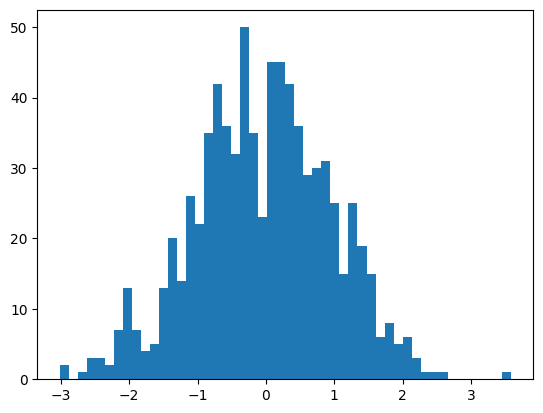

In [570]:
print(save_img[-1].mean(), save_img[-1].var())
plt.hist(save_img[-1].flatten(), bins=50);

In [571]:
# noising process using alpha
